# QF 634 Applied Quantitative Research
## Homework 4 | YU LINGFENG
#### Artificial Neural Network
* Single Layer Perceptron
* MultiLayer Perceptron (MLP)
* Artificial Neural Network (ANN)

In [3]:
# !pip install tensorflow

In [4]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf


#Homework 4 Requirement
import json
import numpy as np
import tensorflow as tf
import keras
from keras import layers
from keras import initializers
keras.utils.set_random_seed(5)
tf.config.experimental.enable_op_determinism()

In [5]:
#Loading Dataset
data = pd.read_csv("Churn_Modelling.csv")

In [6]:
#Generating Dependent Variable Vectors
Y = data.iloc[:,-1].values
X = data.iloc[:,3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
#Generating Dependent Variable Vectors
Y = data.iloc[:,-1].values
X = data.iloc[:,3:13]
X['Gender']=X['Gender'].map({'Female':0,'Male':1})
### above is used instead of a more complicated package involving -- from sklearn.preprocessing import LabelEncoder
### converts Female -- 0, Male -- 1, i.e. hot-encoding categorical variables
print (X['Gender'])

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64


In [8]:
#Encoding Categorical variable Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))
### Geography is transformed into France -- 1,0,0; Spain -- 0,0,1; Germany -- 0,1,0.
### Moreover -- this encoded vector of ones-zeros is now put in first 3 cols. Credit Score pushed to 4th col.

In [9]:
### convert X to dataframe X1
X1 = pd.DataFrame(X)
X1.head()
### Note there are 12 features including onehotencoder for the Geography feature-- 
### The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [10]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [11]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

We call fit_transform() method on our training data and transform() method on our test data. Each feature in the training
set is scaled to mean 0, variance 1. In sklearn.preprocessing.StandardScaler(), centering and scaling happens independently on each feature. The fit method is calculating the mean and variance of each of the features present in the data. The transform method is transforming all the features using the respective feature's mean and variance that are calculated in the statement
before on X_train.

In [12]:
### This is the very first step while creating NNmodel -- you can rename this model. Here we are going to create NNmodel object 
### by using a certain class of Keras named Sequential. As a part of tensorflow 2.0, Keras is now integrated with 
### tensorflow and is now considered as a sub-library of tensorflow. The Sequential class is a part of the models module 
### of Keras library which is a part of the tensorflow library now. 
### It used to be "import tensorflow as tf; from tensorflow import keras; from tensorflow.keras import layers"
### See documentation at https://keras.io/guides/sequential_model/

#Initialising the NN model name -- NNmodel
NNmodel = tf.keras.models.Sequential()
### Sequential specifies to keras that the model NNmodel is created sequentially and the output of each layer added 
### is input to the next specified layer. Note that keras Sequential is not appropriate when the model has multiple outputs

In [13]:
### Creating a network that has 3 hidden layer together with 1 input layer and 1 output layer. 
#Adding First Hidden Layer
NNmodel.add(tf.keras.layers.Dense(units=6,activation="sigmoid"))
#Adding Second Hidden Layer
NNmodel.add(tf.keras.layers.Dense(units=6,activation="sigmoid"))
#Adding Third Hidden Layer
NNmodel.add(tf.keras.layers.Dense(units=6,activation="sigmoid"))
### units = 6 refer to 6 neurons in hidden layer 
### modelname.add is used to add a layer to the neural network
### -- need to specify as an argument what type of layer --
### Dense is used to specify the fully connected layer 
### - i.e. all neurons are forward connect to all forward layer nodes

Above -- first hidden layer is created using the Dense class which is part of the layers module. This class accepts 2 inputs:-
(1) units:- number of neurons that will be present in the respective layer (2) activation:- specify which activation function to be used. This example uses first input as 2. There is no correct answer which is the right number of neurons in the layer -- trial and error. Not too large to be computationally impractical or redundant; not too small to be ineffective.
For the second input, we try the sigmoid or logistic function as an activation function for hidden layers. We can also try “relu”[rectified linear unit].

In [14]:
### now we create the output layer
#Adding Output Layer
NNmodel.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
### Only 1 output neuron

For a binary classification problem as above, actual case output is 1 or 0. Hence we require only one neuron to output layer - output could be estimated probability of case actual output = 1. For multiclass classification problem, if the output contains m categories then we need to create m different neurons, one for each category. In the binary output case, the suitable activation function is the sigmoid function. For multiclass classification problem, the activation function is typically softmax. The softmax function predicts a multinomial probability distribution.

In [15]:
### After creating the layers -- require compiling the NNmodel. Compiling allows the computer to run and understand the program 
### without the need of more fundamental steps in the programming. Compiling adds other elements or linking other libraries, and optimization,
### such that after compiling the results are readily computed e.g. in a binary executable program as an output. 
#Compiling NNmodel
NNmodel.compile(optimizer="adam",
                loss="binary_crossentropy",
                metrics=['accuracy'])
### Note optimizer here is a more sophisticated version of the Mean Square loss

Compile method above accepts inputs: (1) optimizer:- specifies which optimizer to be used in order to perform stochastic gradient descent (2) error/loss function, e.g., 'binary_crossentropy' here. For multiclass classification, it should be categorical_crossentropy, (3) metrics - the performance metrics to use in order to compute performance. 'accuracy' is one such  performance metric.

In [16]:
X_train.shape

(8000, 12)

In [17]:
#### Last step in creation of NNmodel NNmodel is trained on the training set here with Tensor-Keras .fit based on Compiler
#Fitting NNmodel
history=NNmodel.fit(X_train,
                    Y_train,
                    batch_size=100,
                    epochs = 500)
### Note that tf.keras.models.Sequential() by default uses glorot initializer -- drawing intial weights from a uniform 
### distribution -- see other possibilities in https://keras.io/api/layers/initializers/
### Or you could try own customized wts inputs using
### for layer in model.layers:
###    init_layer_weight = [] # the weights yourself in this layer
###    layer.set_weights(init_layer_weight)

Epoch 1/500


80/80 [==============================] - 1s 860us/step - loss: 0.5893 - accuracy: 0.7972
Epoch 2/500
80/80 [==============================] - 0s 687us/step - loss: 0.5327 - accuracy: 0.7972
Epoch 3/500
80/80 [==============================] - 0s 709us/step - loss: 0.5103 - accuracy: 0.7972
Epoch 4/500
80/80 [==============================] - 0s 695us/step - loss: 0.5033 - accuracy: 0.7972
Epoch 5/500
80/80 [==============================] - 0s 709us/step - loss: 0.5007 - accuracy: 0.7972
Epoch 6/500
80/80 [==============================] - 0s 698us/step - loss: 0.4987 - accuracy: 0.7972
Epoch 7/500
80/80 [==============================] - 0s 696us/step - loss: 0.4964 - accuracy: 0.7972
Epoch 8/500
80/80 [==============================] - 0s 772us/step - loss: 0.4937 - accuracy: 0.7972
Epoch 9/500
80/80 [==============================] - 0s 763us/step - loss: 0.4902 - accuracy: 0.7972
Epoch 10/500
80/80 [==============================] - 0s 722us/step - loss: 0.4857 - accu

80/80 [==============================] - 0s 687us/step - loss: 0.3576 - accuracy: 0.8586
Epoch 77/500
80/80 [==============================] - 0s 726us/step - loss: 0.3573 - accuracy: 0.8574
Epoch 78/500
80/80 [==============================] - 0s 698us/step - loss: 0.3568 - accuracy: 0.8571
Epoch 79/500
80/80 [==============================] - 0s 722us/step - loss: 0.3559 - accuracy: 0.8585
Epoch 80/500
80/80 [==============================] - 0s 717us/step - loss: 0.3554 - accuracy: 0.8599
Epoch 81/500
80/80 [==============================] - 0s 684us/step - loss: 0.3549 - accuracy: 0.8596
Epoch 82/500
80/80 [==============================] - 0s 690us/step - loss: 0.3543 - accuracy: 0.8594
Epoch 83/500
80/80 [==============================] - 0s 722us/step - loss: 0.3540 - accuracy: 0.8585
Epoch 84/500
80/80 [==============================] - 0s 695us/step - loss: 0.3532 - accuracy: 0.8614
Epoch 85/500
80/80 [==============================] - 0s 699us/step - loss: 0.3527 - accuracy: 

80/80 [==============================] - 0s 696us/step - loss: 0.3342 - accuracy: 0.8633
Epoch 156/500
80/80 [==============================] - 0s 683us/step - loss: 0.3340 - accuracy: 0.8630
Epoch 157/500
80/80 [==============================] - 0s 684us/step - loss: 0.3341 - accuracy: 0.8621
Epoch 158/500
80/80 [==============================] - 0s 727us/step - loss: 0.3340 - accuracy: 0.8625
Epoch 159/500
80/80 [==============================] - 0s 713us/step - loss: 0.3338 - accuracy: 0.8621
Epoch 160/500
80/80 [==============================] - 0s 722us/step - loss: 0.3341 - accuracy: 0.8624
Epoch 161/500
80/80 [==============================] - 0s 703us/step - loss: 0.3336 - accuracy: 0.8619
Epoch 162/500
80/80 [==============================] - 0s 705us/step - loss: 0.3334 - accuracy: 0.8635
Epoch 163/500
80/80 [==============================] - 0s 736us/step - loss: 0.3336 - accuracy: 0.8620
Epoch 164/500
80/80 [==============================] - 0s 741us/step - loss: 0.3338 - a

80/80 [==============================] - 0s 724us/step - loss: 0.3306 - accuracy: 0.8625
Epoch 235/500
80/80 [==============================] - 0s 684us/step - loss: 0.3304 - accuracy: 0.8634
Epoch 236/500
80/80 [==============================] - 0s 728us/step - loss: 0.3297 - accuracy: 0.8621
Epoch 237/500
80/80 [==============================] - 0s 734us/step - loss: 0.3303 - accuracy: 0.8630
Epoch 238/500
80/80 [==============================] - 0s 703us/step - loss: 0.3300 - accuracy: 0.8641
Epoch 239/500
80/80 [==============================] - 0s 703us/step - loss: 0.3300 - accuracy: 0.8624
Epoch 240/500
80/80 [==============================] - 0s 727us/step - loss: 0.3300 - accuracy: 0.8629
Epoch 241/500
80/80 [==============================] - 0s 715us/step - loss: 0.3298 - accuracy: 0.8620
Epoch 242/500
80/80 [==============================] - 0s 696us/step - loss: 0.3299 - accuracy: 0.8616
Epoch 243/500
80/80 [==============================] - 0s 684us/step - loss: 0.3300 - a

80/80 [==============================] - 0s 699us/step - loss: 0.3286 - accuracy: 0.8635
Epoch 314/500
80/80 [==============================] - 0s 696us/step - loss: 0.3288 - accuracy: 0.8633
Epoch 315/500
80/80 [==============================] - 0s 647us/step - loss: 0.3286 - accuracy: 0.8633
Epoch 316/500
80/80 [==============================] - 0s 660us/step - loss: 0.3291 - accuracy: 0.8631
Epoch 317/500
80/80 [==============================] - 0s 696us/step - loss: 0.3287 - accuracy: 0.8633
Epoch 318/500
80/80 [==============================] - 0s 690us/step - loss: 0.3287 - accuracy: 0.8648
Epoch 319/500
80/80 [==============================] - 0s 852us/step - loss: 0.3287 - accuracy: 0.8637
Epoch 320/500
80/80 [==============================] - 0s 678us/step - loss: 0.3287 - accuracy: 0.8639
Epoch 321/500
80/80 [==============================] - 0s 703us/step - loss: 0.3286 - accuracy: 0.8633
Epoch 322/500
80/80 [==============================] - 0s 690us/step - loss: 0.3287 - a

80/80 [==============================] - 0s 699us/step - loss: 0.3281 - accuracy: 0.8637
Epoch 393/500
80/80 [==============================] - 0s 708us/step - loss: 0.3287 - accuracy: 0.8633
Epoch 394/500
80/80 [==============================] - 0s 709us/step - loss: 0.3276 - accuracy: 0.8646
Epoch 395/500
80/80 [==============================] - 0s 697us/step - loss: 0.3280 - accuracy: 0.8637
Epoch 396/500
80/80 [==============================] - 0s 696us/step - loss: 0.3281 - accuracy: 0.8641
Epoch 397/500
80/80 [==============================] - 0s 665us/step - loss: 0.3280 - accuracy: 0.8646
Epoch 398/500
80/80 [==============================] - 0s 706us/step - loss: 0.3279 - accuracy: 0.8641
Epoch 399/500
80/80 [==============================] - 0s 707us/step - loss: 0.3285 - accuracy: 0.8631
Epoch 400/500
80/80 [==============================] - 0s 735us/step - loss: 0.3278 - accuracy: 0.8634
Epoch 401/500
80/80 [==============================] - 0s 684us/step - loss: 0.3279 - a

80/80 [==============================] - 0s 734us/step - loss: 0.3274 - accuracy: 0.8631
Epoch 472/500
80/80 [==============================] - 0s 737us/step - loss: 0.3276 - accuracy: 0.8644
Epoch 473/500
80/80 [==============================] - 0s 734us/step - loss: 0.3274 - accuracy: 0.8637
Epoch 474/500
80/80 [==============================] - 0s 716us/step - loss: 0.3273 - accuracy: 0.8636
Epoch 475/500
80/80 [==============================] - 0s 703us/step - loss: 0.3284 - accuracy: 0.8637
Epoch 476/500
80/80 [==============================] - 0s 696us/step - loss: 0.3274 - accuracy: 0.8634
Epoch 477/500
80/80 [==============================] - 0s 703us/step - loss: 0.3277 - accuracy: 0.8629
Epoch 478/500
80/80 [==============================] - 0s 709us/step - loss: 0.3272 - accuracy: 0.8645
Epoch 479/500
80/80 [==============================] - 0s 728us/step - loss: 0.3273 - accuracy: 0.8627
Epoch 480/500
80/80 [==============================] - 0s 732us/step - loss: 0.3273 - a

In [18]:
NNmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (100, 6)                  78        
                                                                 
 dense_1 (Dense)             (100, 6)                  42        
                                                                 
 dense_2 (Dense)             (100, 6)                  42        
                                                                 
 dense_3 (Dense)             (100, 1)                  7         
                                                                 
Total params: 169 (676.00 Byte)
Trainable params: 169 (676.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


[0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.797249972820282, 0.7973750233650208, 0.8015000224113464, 0.8087499737739563, 0.8153749704360962, 0.8201249837875366, 0.8211249709129333, 0.8206250071525574, 0.8228750228881836, 0.8240000009536743, 0.8247500061988831, 0.8271250128746033, 0.8270000219345093, 0.8287500143051147, 0.828499972820282, 0.8295000195503235, 0.8286250233650208, 0.8291249871253967, 0.8307499885559082, 0.8299999833106995, 0.8323749899864197, 0.8335000276565552, 0.8345000147819519, 0.8368750214576721, 0.8371250033378601, 0.8395000100135803, 0.8412500023841858, 0.841

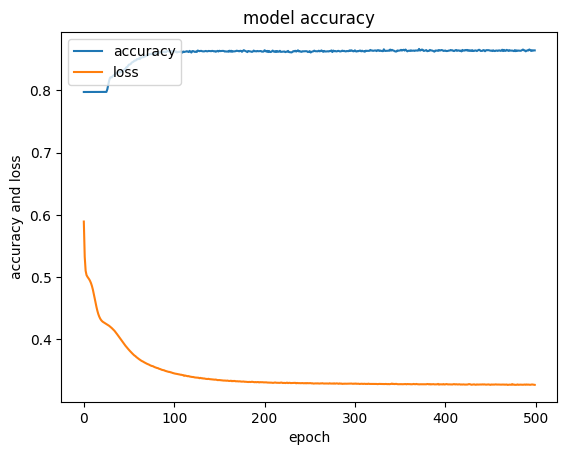

In [19]:
import matplotlib.pyplot as plt
print(history.history['accuracy'])
print(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [23]:
### Below are the weights in the final iteration
first_layer_weights = NNmodel.layers[0].get_weights()[0]
first_layer_biases  = NNmodel.layers[0].get_weights()[1]
second_layer_weights = NNmodel.layers[1].get_weights()[0]
second_layer_biases  = NNmodel.layers[1].get_weights()[1]
third_layer_weights = NNmodel.layers[2].get_weights()[0]
third_layer_biases  = NNmodel.layers[2].get_weights()[1]
fourth_layer_weights = NNmodel.layers[3].get_weights()[0]
fourth_layer_biases  = NNmodel.layers[3].get_weights()[1]

In [24]:
print(first_layer_weights)
first_layer_weights.shape

[[ 1.03574967e+00  1.67490557e-01  1.86995149e-01  3.36509019e-01
   3.79849851e-01 -1.69410408e-01]
 [-1.04325938e+00  7.36042932e-02 -3.56880017e-02  5.67914069e-01
   5.10322332e-01 -1.68643996e-01]
 [ 8.10043156e-01  3.93642128e-01 -7.13650286e-01  2.27512211e-01
   5.12643039e-01  7.42869079e-02]
 [ 9.14491042e-02  1.44293644e-02 -9.75098014e-02 -3.92602906e-02
  -5.40375113e-02 -6.20480850e-02]
 [ 1.19302310e-01  9.41861654e-04  3.41549605e-01  1.05293855e-01
  -2.01200619e-02 -5.82128167e-02]
 [ 8.12340807e-03 -2.12230253e+00 -4.27198982e+00  3.30789447e-01
   9.44071770e-01  1.05584037e+00]
 [ 2.10827515e-01  2.31868163e-01 -6.51495636e-01  7.86039233e-02
   1.52221560e-01  3.33293617e-01]
 [-2.56467605e+00 -1.42363340e-01  1.34121850e-01  1.55861184e-01
   1.98427126e-01 -2.92146623e-01]
 [-1.82030594e+00 -4.34886783e-01 -6.22622013e-01 -8.05621684e-01
   3.78203821e+00  6.78933442e-01]
 [-1.36345699e-01  5.77987656e-02 -8.14865083e-02  3.79989333e-02
   1.44718140e-01  9.9689

(12, 6)

In [25]:
print(first_layer_biases)
first_layer_biases.shape  ### (2,) here basically means 2 elements in a 1-dim array. .T has no effect on 1d array

[ 1.164891    0.5052586  -0.9442029   0.12938133  1.1872071   0.6353613 ]


(6,)

In [26]:
print(second_layer_weights)
second_layer_weights.shape

[[ 0.13268632 -0.8023543   1.0004481   1.2128      1.0055463   1.1024324 ]
 [-2.0047786  -0.0628676  -0.12693255  0.9996308   1.5243332   0.17457227]
 [-0.6147839   0.7945753  -0.22524484 -0.7251248  -0.6961466  -0.21500689]
 [-1.4233338  -1.6550987   1.339142    2.1181324   1.9623063   1.822303  ]
 [-2.1103895  -1.4874996   2.1230435   1.1365488   1.4602978   1.4927187 ]
 [ 1.0954206   1.6544011  -2.0529993  -1.9984466  -1.7094976  -1.6852568 ]]


(6, 6)

In [27]:
print(second_layer_biases)
second_layer_biases.shape

[ 1.1186947   0.79159796 -0.87981635 -0.7680316  -1.1356155  -1.1445026 ]


(6,)

In [28]:
### Now we use the trained weights and biases to try to predict based on a new case
tr=sc.transform([[0, 0, 1, 650, 1, 60, 2, 300000, 2, 1, 0, 80000]])
print(tr)  ### tr.shape is (1,12)

[[-9.98501123e-01 -5.83123916e-01  1.74601919e+00 -3.24425289e-03
   9.15090654e-01  2.01683866e+00 -1.04828130e+00  3.58411758e+00
   8.02256955e-01  6.43760170e-01 -1.02327069e+00 -3.49886744e-01]]


In [29]:
### Example
### Predicting result for Single Observation
print(NNmodel.predict(tr))
### note in each recompute -- this no. will change slightly because of the random initiation of the weights

1/1 [==============================] - 0s 63ms/step
[[0.729483]]


In [31]:
### now we compute the predicted prob of 1, manually
tr.dot(first_layer_weights)  ### gives a 1 x 6 matrix

array([[-9.88556794, -4.3574272 , -7.98658998, -0.28446817,  5.16841539,
         1.10429385]])

In [33]:
Flayerneurons_sum=tr.dot(first_layer_weights) + first_layer_biases
print(Flayerneurons_sum)  ### 1 x 6 matrix

[[-8.72067694 -3.85216858 -8.93079288 -0.15508684  6.3556225   1.73965516]]


In [34]:
Flayerneurons_act=1/(1+np.exp(-Flayerneurons_sum))
print(Flayerneurons_act)  ### 1 x 6 matrix -- output of neurons in hidden layer

[[1.63150071e-04 2.07921466e-02 1.32235634e-04 4.61305815e-01
  9.98266058e-01 8.50643260e-01]]


In [35]:
Slayerneurons_sum=Flayerneurons_act.dot (second_layer_weights)+second_layer_biases
print(Slayerneurons_sum)

[[-0.75455881 -0.05085691  0.10842418 -0.33542544 -0.19503285 -0.24350444]]


In [36]:
predprob=1/(1+np.exp(-Slayerneurons_sum))
print(predprob) ### Note this is the same output as NNmodel.predict(tr)
### This manual computation of the forward pass should have output same as in NNmodel.predict(tr)

[[0.31982877 0.48728851 0.52707952 0.41692112 0.45139576 0.43942292]]


In [37]:
### Now we use the trained NNmodel to predict output in X_train sample
NNmodel.evaluate(X_train,Y_train)  ### evaluates the loss and accuracy as specified in the Compiler

250/250 [==============================] - 0s 599us/step - loss: 0.3269 - accuracy: 0.8645


[0.32685568928718567, 0.8644999861717224]

In [38]:
### Now we use the trained NNmodel to predict output in X_train sample -- computing manually via .predict
TE=NNmodel.predict(X_train)  ### note X_train has 8000 data points

250/250 [==============================] - 0s 552us/step


In [39]:
TE.shape

(8000, 1)

In [40]:
h=(TE > 0.5).astype(int) ### Convert TE>0.5 == true ==> 1, False to 0

In [41]:
print(h)
h.shape

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


(8000, 1)

In [42]:
### replace all elements in numpy array of value 0 with value -1
h[h==0]=-1

In [43]:
print(h)
h.shape

[[-1]
 [-1]
 [ 1]
 ...
 [-1]
 [-1]
 [-1]]


(8000, 1)

In [44]:
### replace all elements in numpy array of value 0 with value -1
Y_train1=Y_train
Y_train1[Y_train1==0]=-1

In [45]:
print(Y_train1)

[-1 -1  1 ...  1 -1  1]


In [46]:
Y_train1.shape

(8000,)

In [47]:
J=np.multiply(Y_train1.T,h.T)  ### element by element multiplication
c=np.count_nonzero(J > 0) 
print(c,c/8000)

6916 0.8645


In [48]:
### Now we use the trained NNmodel to predict output in X_test sample
NNmodel.evaluate(X_test,Y_test)  ### evaluates the loss and accuracy as specified in the Compiler

63/63 [==============================] - 0s 713us/step - loss: 0.3279 - accuracy: 0.8675


[0.32790279388427734, 0.8675000071525574]

In [49]:
### Now we use the trained NNmodel to predict output in X_test sample -- computing manually via .predict
TE1=NNmodel.predict(X_test)  ### note X_test has 2000 data points

63/63 [==============================] - 0s 581us/step


In [50]:
h1=(TE1 > 0.5).astype(int) ### Convert TE1>0.5 == true ==> 1, False to 0
h1[h1==0]=-1
Y_test1=Y_test
Y_test1[Y_test1==0]=-1
J1=np.multiply(Y_test1.T,h1.T)  ### element by element multiplication
c1=np.count_nonzero(J1 > 0) 
print(c1,c1/2000)

1735 0.8675
